In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import numpy as np
from IPython.display import display
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
import pickle
import codecs
import collections
import keras.preprocessing
from sklearn.model_selection import KFold
import csv

Using TensorFlow backend.


In [3]:
from keras.models import Sequential, Model
from keras.layers import Embedding, LSTM, Reshape, Activation, Input, Dense,GRU,Reshape,TimeDistributed,Bidirectional,Dropout,Masking
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.layers import Embedding,TimeDistributed,Flatten
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import GRU, Dropout
from keras.models import load_model
from keras.layers import Embedding, Reshape, Activation, Input, Dense, Masking
from keras.layers.merge import Dot
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.utils.np_utils import to_categorical
from keras.preprocessing.sequence import skipgrams
from keras.preprocessing import sequence
from keras import backend as K
from keras.optimizers import Adam
from keras.layers.convolutional import Conv1D
from keras.layers import Embedding,TimeDistributed,Flatten
from keras.layers import BatchNormalization,Dropout


In [4]:
import seaborn as sns
sns.set(style="darkgrid")

In [5]:
plt.rcParams['font.family']='TH SarabunPSK' #you can change to other font that works for you
plt.rcParams.update({'font.size': 50})
#fill your code here

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [7]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [8]:
input_pbs = pd.read_csv('notebook7-extractFeature-thispbs.csv')

In [9]:
input_pbs.drop('Unnamed: 0', axis=1, inplace=True)
# input_pbs.drop('Unnamed: 0.1', axis=1,inplace=True)
# input_pbs.drop('Unnamed: 1', axis=1, inplace=True)

In [10]:
input_pbs.head()

,headline,date,DOW,time,view,category,tag,hour,numTag,token,numToken,numChar,year-month,month,year,sentiment,timeDelta,num_noun,num_pronoun,num_verb,num_preverb,num_determiner,num_adverb,num_classifier,num_conjunction,num_preposition,num_interjunction,num_prefix,num_ending,num_negator,num_punctuation,is_environment,is_politic,is_health,is_crime,is_social,is_inter,is_sport,is_economic,is_region,is_science,is_art,is_lifestyle,is_disaster,is_south,is_special_report,is_article,is_agriculture,is_education,is_women,is_asian,nnoun_per_ntoken,nverb_per_ntoken,nadverb_per_ntoken,num_date,num_email,num_law,num_len,num_location,num_money,num_organization,num_percent,num_person,num_phone,num_time,num_url,num_person_2,num_pos,num_neg,sim_top,sim_worst,is_Mon,is_Tue,is_Wed,is_Thu,is_Fri,is_Sat,is_Sun,is_weekend,tag_pop_sum,tag_pop_mean,tag_top_pop_sum,tag_top_pop_mean,num_tag_pop,tag_top_worst_sum,tag_top_worst_mean,num_tag_worst,is_pos,is_neg
0,ฝุ่น PM2.5 : ทส.เตรียมตั้งศูนย์แก้ปัญหาหมอกควันข้ามแดน,2019-05-04,FRI,19:37,177,สิ่งแวดล้อม,"ฝุ่นเชียงใหม่,ฝุ่นPM2.5,ฝุ่นคลุมเมือง,เชียงใหม่,เชียงราย,ดอยหลวงเชียงดาว,ไฟป่า,หมอกควันข้ามแดน,ThaiPBSnews,ไทยพีบีเอส",19,10,"ฝุ่น,PM,ทส.,เตรียม,ศูนย์,แก้,ปัญหา,หมอก,ควัน,ข้าม,แดน",11,43,2562-04,4,2562,pos,0,8,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.727273,0.272727,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.720796,0.726361,0,0,0,0,1,0,0,0,1234,154,0,0,0,0,0,0,1,0
1,"เลือกตั้ง 2562 : ""เพื่อไทย"" เตรียมยื่น กกต.จัดเลือกตั้งใหม่ 3 เขต กทม.",2019-05-04,FRI,19:20,702,การเมือง,"เลือกตั้ง62,เพื่อ่ไทย,กกต.,นับคะแนน,ไทยพีบีเอส,ข่าวไทยพีบีเอส",19,6,"เลือกตั้ง,2562,ไทย,เตรียม,ยื่น,กกต.,เลือกตั้ง,เขต,กทม.",9,46,2562-04,4,2562,pos,0,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.888889,0.111111,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.797819,0.712586,0,0,0,0,1,0,0,0,762,190,1,1,1,0,0,0,1,0
2,เตรียมเอาผิด รพ.เอกชน 58 แห่งไม่ส่งข้อมูลราคายา,2019-05-04,FRI,19:18,583,สาธารณสุข,"ยา,เวชภัณฑ์ฯ,โรงพยาบาล,ค่าบริการทางการแพทย์,กรมการค้าภายใน,ThaiPBSnews,ThaiPBS,ไทยพีบีเอส,ข่าวไทยพีบีเอส",19,9,"เตรียม,รพ.เอกชน,ข้อมูล,ราคา,ยา",5,26,2562-04,4,2562,pos,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.800000,0.200000,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.648916,0.646782,0,0,0,0,1,0,0,0,148,29,2,1,2,0,0,0,1,0
3,ตั้งข้อสังเกตปลดล็อกกัญชา เอื้อนายทุนหรือไม่?,2019-05-04,FRI,19:16,928,อาชญากรรม,"กัญชา,มูลนิธิข้าวขวัญ,ThaiPBSnews",19,3,"ข้อ,สังเกต,ปลด,ล็อก,กัญชา,เอื้อ,ทุน",7,29,2562-04,4,2562,neg,0,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.571429,0.428571,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.716590,0.586499,0,0,0,0,1,0,0,0,72,36,4,2,2,0,0,0,0,1
4,"คำพิพากษาเต็ม ""เปรมชัย"" หลุดคดีครอบครองซากเสือดำ",2019-05-04,FRI,19:29,5163,สิ่งแวดล้อม,"เสือดำ,เปรมชัย,เขตรักษาพันธุ์สัตว์ป่าทุ่งใหญ่นเรศวร,ไทยพีบีเอส,ThaiPBSnews",19,5,"พิพากษา,เต็ม,เปรมชัย,หลุดคดี,ครอบครอง,ซาก,เสือดำ",7,42,2562-04,4,2562,neg,0,6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.857143,0.142857,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.612798,0.561536,0,0,0,0,1,0,0,0,295,98,19,6,3,0,0,0,0,1


In [11]:
input_pbs['view'].describe()

count    2.753800e+04
mean     2.455730e+03
std      1.272891e+04
min      2.000000e+01
25%      2.530000e+02
50%      5.620000e+02
75%      1.559000e+03
max      1.208350e+06
Name: view, dtype: float64

In [12]:
IQRval = input_pbs['view'].describe().loc['75%']-input_pbs['view'].describe().loc['25%']

In [13]:
input_pbs['view'].describe().loc['25%']

253.0

In [14]:
outlierMin = max(input_pbs['view'].describe().loc['25%'],0)
outlierMax = input_pbs['view'].describe().loc['75%']+1.5*IQRval
print(outlierMin,outlierMax)

253.0 3518.0


In [15]:
input_pbs = input_pbs[(input_pbs['view']<=outlierMax) & (input_pbs['view']>=outlierMin)]

In [16]:
# input_pbs = input_pbs[input_pbs['year-month']< '2562-04' ]

In [17]:
MAXVIEW = input_pbs['view'].max()
MAXVIEW

3517

In [18]:
view_mean = input_pbs['view'].describe()['mean']
view_sd = input_pbs['view'].describe()['std']

In [19]:
input_pbs['view'].describe()

count    17276.000000
mean     1000.677877 
std      777.346922  
min      253.000000  
25%      413.750000  
50%      702.000000  
75%      1345.000000 
max      3517.000000 
Name: view, dtype: float64

## Feature extraction

In [92]:
input_pbs_train, input_pbs_test = train_test_split(input_pbs, test_size=0.2,random_state=100)

In [93]:
input_pbs_train, input_pbs_val = train_test_split(input_pbs_train, test_size=0.2,random_state=100)

In [194]:
input_pbs_train.shape

(11056, 89)

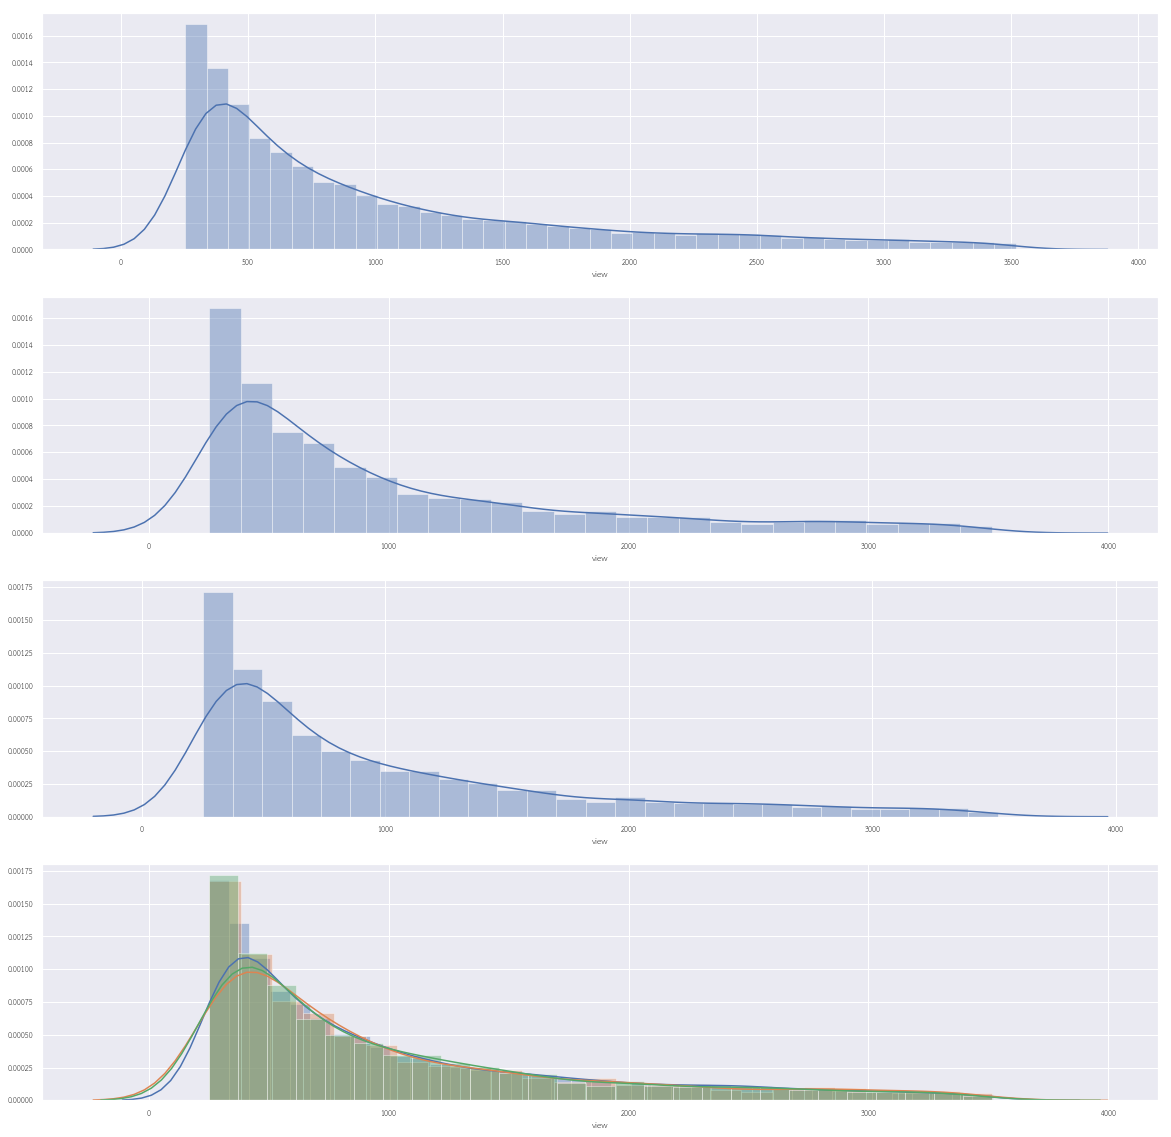

In [98]:
f, axarr = plt.subplots(4, figsize=(20,20))
sns.distplot(input_pbs_train['view'],ax=axarr[0])
sns.distplot(input_pbs_val['view'],ax=axarr[1])
sns.distplot(input_pbs_test['view'],ax=axarr[2])
sns.distplot(input_pbs_train['view'],ax=axarr[3])
sns.distplot(input_pbs_val['view'],ax=axarr[3])
sns.distplot(input_pbs_test['view'],ax=axarr[3])

## Bag of word feature

In [100]:
inputText_train = []
for sent in input_pbs_train['token']:
    inputText_train.append(sent.split(','))

In [101]:
inputText_val = []
for sent in input_pbs_val['token']:
    inputText_val.append(sent.split(','))

In [102]:
inputText_test = []
for sent in input_pbs_test['token']:
    inputText_test.append(sent.split(','))

In [103]:
np.log(input_pbs_train['view']).describe()

count    11056.000000
mean     6.647266    
std      0.719497    
min      5.533389    
25%      6.033086    
50%      6.563856    
75%      7.211557    
max      8.165364    
Name: view, dtype: float64

In [104]:
MAXVIEW_log = np.log(input_pbs['view']).describe()['max']

In [105]:
MAXVIEW_log

8.165363632473982

In [106]:
MINVIEW_log = np.log(input_pbs['view']).describe()['min']

In [107]:
MINVIEW_log

5.53338948872752

In [108]:
# MEANVIEW_log = np.log(input_pbs_train['view']).describe()['mean']

In [109]:
# diff_log = MAXVIEW_log-MINVIEW_log

In [110]:
input_pbs['view'].quantile(0.3)

456.0

In [111]:
input_pbs['class'] = -1

In [175]:
q1 = input_pbs['view'].quantile(0.25)
q2 = input_pbs['view'].quantile(0.5)
q3 = input_pbs['view'].quantile(0.75)
# q4 = input_pbs['view'].quantile(1.0)
# q5 = input_pbs['view'].quantile(0.5)
# q6 = input_pbs['view'].quantile(0.6)
# q7 = input_pbs['view'].quantile(0.7)
# q8 = input_pbs['view'].quantile(0.8)
# q9 = input_pbs['view'].quantile(0.9)

In [195]:
inputLabel_train = []
for view in input_pbs_train['view']:
#     inputLabel_train.append((view-view_mean)/view_sd)
#     inputLabel_train.append((np.log(view)-MINVIEW_log)/diff_log)
#     inputLabel_train.append((np.log(view)/MAXVIEW_log))
    if view <= q1 :
        inputLabel_train.append(0)
    elif view <= q2 : 
        inputLabel_train.append(1)
    elif view <= q3 : 
        inputLabel_train.append(2)
#     elif view <= q4 : 
#         inputLabel_train.append(3)
#     elif view <= q5 : 
#         inputLabel_train.append(4)
#     elif view <= q6 : 
#         inputLabel_train.append(5)
#     elif view <= q7 : 
#         inputLabel_train.append(6)
#     elif view <= q8 : 
#         inputLabel_train.append(7)
#     elif view <= q9 : 
#         inputLabel_train.append(8)
    else: 
        inputLabel_train.append(3)
#     inputLabel_train.append(np.power(np.log(view)/MAXVIEW_log,0.75))
#         inputLabel_train.append(view/MAXVIEW)

In [196]:
inputLabel_val = []
for view in input_pbs_val['view']:
#     inputLabel_val.append((view-view_mean)/view_sd)
#     inputLabel_val.append((np.log(view)-MINVIEW_log)/diff_log)
#     inputLabel_val.append((np.log(view)/MAXVIEW_log))
    if view <= q1 :
        inputLabel_val.append(0)
    elif view <= q2 : 
        inputLabel_val.append(1)
    elif view <= q3 : 
        inputLabel_val.append(2)
#     elif view <= q4 : 
#         inputLabel_val.append(3)
#     elif view <= q5 : 
#         inputLabel_val.append(4)
#     elif view <= q6 : 
#         inputLabel_val.append(5)
#     elif view <= q7 : 
#         inputLabel_val.append(6)
#     elif view <= q8 : 
#         inputLabel_val.append(7)
#     elif view <= q9 : 
#         inputLabel_val.append(8)
    else: 
        inputLabel_val.append(3)
#     inputLabel_val.append(np.power(np.log(view)/MAXVIEW_log,0.75))
#         inputLabel_val.append(view/MAXVIEW)

In [197]:
inputLabel_test = []
for view in input_pbs_test['view']:
#     inputLabel_test.append((view-view_mean)/view_sd)
#     inputLabel_test.append((np.log(view)/MAXVIEW_log))
#     inputLabel_test.append(findClass(view))
    if view <= q1 :
        inputLabel_test.append(0)
    elif view <= q2 : 
        inputLabel_test.append(1)
    elif view <= q3 : 
        inputLabel_test.append(2)
#     elif view <= q4 : 
#         inputLabel_test.append(3)
#     elif view <= q5 : 
#         inputLabel_test.append(4)
#     elif view <= q6 : 
#         inputLabel_test.append(5)
#     elif view <= q7 : 
#         inputLabel_test.append(6)
#     elif view <= q8 : 
#         inputLabel_test.append(7)
#     elif view <= q9 : 
#         inputLabel_test.append(8)
    else: 
        inputLabel_test.append(3)
#     inputLabel_test.append((np.log(view)-MINVIEW_log)/diff_log)
#         inputLabel_test.append(view/MAXVIEW)

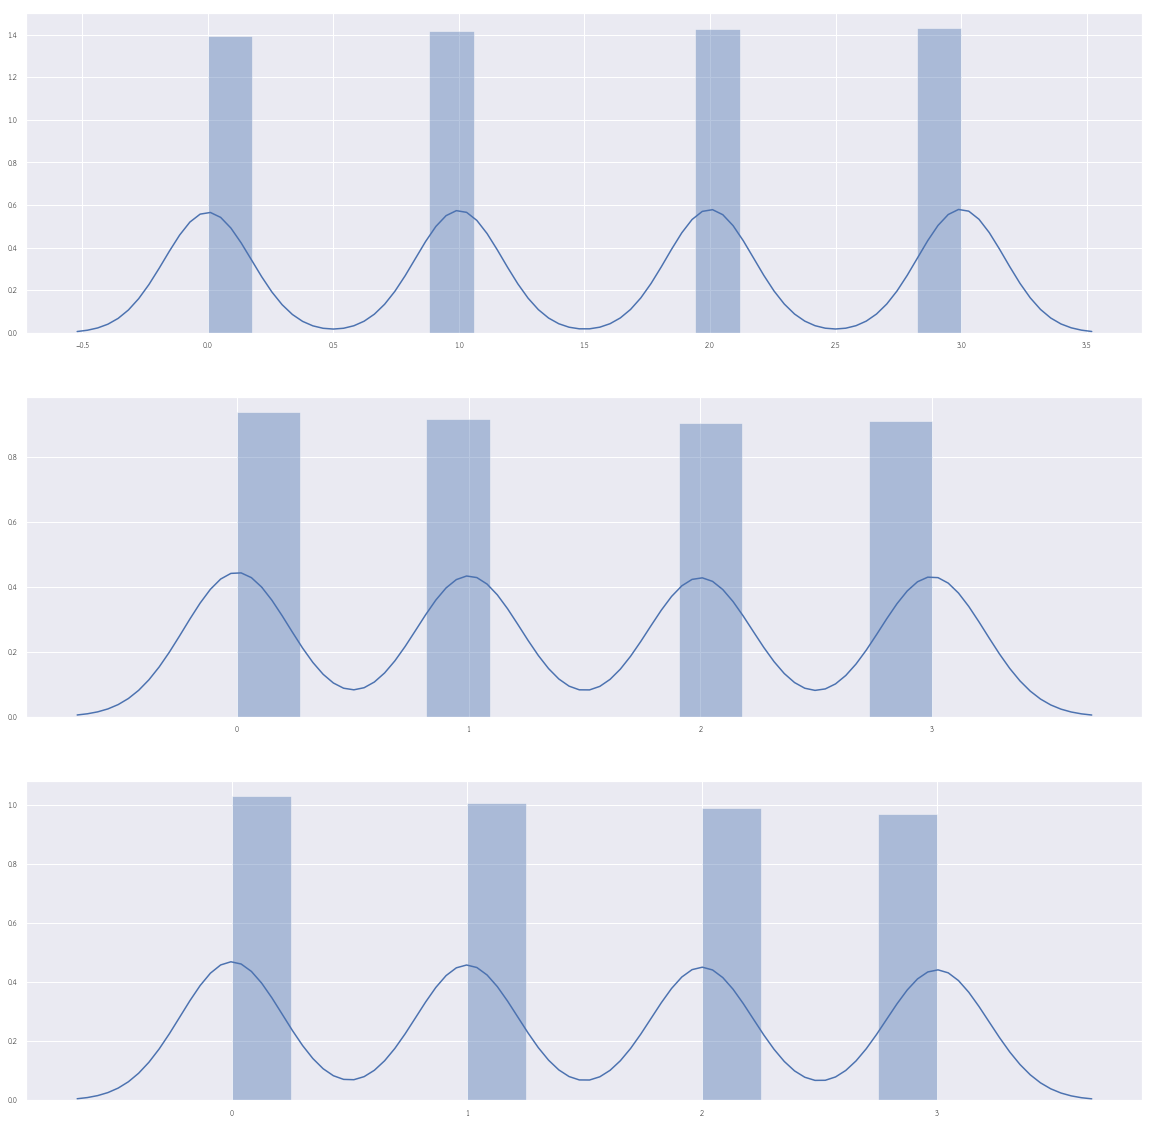

In [198]:
f, axarr = plt.subplots(3, figsize=(20,20))
sns.distplot(inputLabel_train,ax=axarr[0])
sns.distplot(inputLabel_val,ax=axarr[1])
sns.distplot(inputLabel_test,ax=axarr[2])

In [33]:
print(len(inputText_train),len(inputLabel_train))

13820 13820


In [34]:
print(len(inputText_test),len(inputLabel_test))

3456 3456


In [117]:
words = []
for sentence in inputText_train:
    for word in sentence:
        words.append(word)
for sentence in inputText_val:
    for word in sentence:
        words.append(word)
        
word_count = list()
word_count.extend(collections.Counter(words).most_common(len(set(words))))
word_count = word_count[:len(word_count)//4]
word_count.append(("UNK",0))

train_word = set()
for i in word_count:
    train_word.add(i[0])

In [118]:
len(word_count)

3489

In [119]:
all_token = set()
for word in train_word:
    all_token.add(word)

In [120]:
all_token = list(all_token)
all_token.insert(0,'for padding')
all_token.insert(1,'UNK')

In [121]:
len(all_token)

3491

In [122]:
token_map = dict(zip(all_token, range(len(all_token))))
token_map_reverse = dict(zip(range(len(all_token)),all_token))

In [123]:
input_data_train = np.asarray(input_pbs_train['token'].str.split(','))
input_data_val = np.asarray(input_pbs_val['token'].str.split(','))
input_data_test = np.asarray(input_pbs_test['token'].str.split(','))

In [124]:
def count_word(sent):
    global all_token, token_map
    result = np.zeros(len(all_token))
    np_token = np.array(sent)
    str_token, str_token_count = np.unique(np_token, return_counts=True)
    for char, count in zip(str_token, str_token_count):
        if char not in token_map.keys():
            char = 'UNK'
        result[token_map[char]] = count
    return result

In [125]:
temp_train = np.vectorize(count_word, otypes=[object])(input_data_train)
x_f1_train = np.array([[e for e in sl] for sl in temp_train.tolist()])
temp_val = np.vectorize(count_word, otypes=[object])(input_data_val)
x_f1_val = np.array([[e for e in sl] for sl in temp_val.tolist()])
temp_test = np.vectorize(count_word, otypes=[object])(input_data_test)
x_f1_test = np.array([[e for e in sl] for sl in temp_test.tolist()])

## Numerical feature

In [126]:
input_pbs.columns

Index(['headline', 'date', 'DOW', 'time', 'view', 'category', 'tag', 'hour',
       'numTag', 'token', 'numToken', 'numChar', 'year-month', 'month', 'year',
       'sentiment', 'timeDelta', 'num_noun', 'num_pronoun', 'num_verb',
       'num_preverb', 'num_determiner', 'num_adverb', 'num_classifier',
       'num_conjunction', 'num_preposition', 'num_interjunction', 'num_prefix',
       'num_ending', 'num_negator', 'num_punctuation', 'is_environment',
       'is_politic', 'is_health', 'is_crime', 'is_social', 'is_inter',
       'is_sport', 'is_economic', 'is_region', 'is_science', 'is_art',
       'is_lifestyle', 'is_disaster', 'is_south', 'is_special_report',
       'is_article', 'is_agriculture', 'is_education', 'is_women', 'is_asian',
       'nnoun_per_ntoken', 'nverb_per_ntoken', 'nadverb_per_ntoken',
       'num_date', 'num_email', 'num_law', 'num_len', 'num_location',
       'num_money', 'num_organization', 'num_percent', 'num_person',
       'num_phone', 'num_time', 'num_url', 'nu

In [127]:
numerical_feature = [
       'numTag', 'numToken', 'numChar','timeDelta', 'num_noun', 'num_pronoun', 'num_verb',
       'num_preverb', 'num_determiner', 'num_adverb', 'num_classifier',
       'num_conjunction', 'num_preposition', 'num_interjunction', 'num_prefix',
       'num_ending', 'num_negator', 'num_punctuation',
       'nnoun_per_ntoken', 'nverb_per_ntoken', 'nadverb_per_ntoken',
       'num_date', 'num_email', 'num_law', 'num_len', 'num_location',
       'num_money', 'num_organization', 'num_percent', 'num_person',
       'num_phone', 'num_time', 'num_url', 'num_person_2', 'num_pos',
       'num_neg', 'sim_top', 'sim_worst', 'tag_pop_sum',
       'tag_pop_mean', 'tag_top_pop_sum', 'tag_top_pop_mean', 'num_tag_pop',
       'tag_top_worst_sum', 'tag_top_worst_mean', 'num_tag_worst']

# numerical_feature = ['num_tag_pop','tag_top_pop_sum', 'tag_top_pop_mean','sim_top','numTag','tag_pop_sum',
#                      'num_person','num_classifier','tag_pop_mean','timeDelta','num_tag_worst',
#                      'tag_top_worst_sum', 'tag_top_worst_mean','numChar','num_location','sim_worst',
#                     'num_verb','num_noun','nverb_per_ntoken']

# numerical_feature = ['num_tag_pop','tag_top_pop_sum', 'tag_top_pop_mean','sim_top','numTag','tag_pop_sum',
#                      'num_person','num_classifier','tag_pop_mean']

# numerical_feature = ['num_tag_pop','tag_top_pop_sum', 'tag_top_pop_mean','sim_top','numTag','tag_pop_sum',
#                      'num_person','num_classifier','tag_pop_mean','timeDelta','sim_worst','numChar',
#                     'numTag','nnoun_per_ntoken','nverb_per_ntoken','numToken','num_noun','num_verb',
#                      'tag_top_worst_sum','num_neg','tag_top_worst_mean','num_person','num_classifier',
#                     'num_location','num_pos','num_tag_worst','num_organization']

In [128]:
cs = MinMaxScaler()

In [129]:
trainContinuous = cs.fit_transform(input_pbs_train[numerical_feature])
valContinuous = cs.fit_transform(input_pbs_val[numerical_feature])
testContinuous = cs.fit_transform(input_pbs_test[numerical_feature])

/home/burin/py_36_env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/burin/py_36_env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/burin/py_36_env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Categorial feature

In [130]:
categorial_feature = ['DOW', 'hour',
        'month', 'year',
        'is_environment',
       'is_politic', 'is_health', 'is_crime', 'is_social', 'is_inter',
       'is_sport', 'is_economic', 'is_region', 'is_science', 'is_art',
       'is_lifestyle', 'is_disaster', 'is_south', 'is_special_report',
       'is_article', 'is_agriculture', 'is_education', 'is_women', 'is_asian',
       'is_Mon', 'is_Tue', 'is_Wed',
       'is_Thu', 'is_Fri', 'is_Sat', 'is_Sun', 'is_weekend', 'is_pos',
       'is_neg']

# categorial_feature = ['year','is_social','is_health','is_disaster','is_weekend','is_Sat','is_inter',
#                      'is_region','is_Wed','is_asian','is_south']

# categorial_feature = ['year','is_social','is_health','is_disaster','is_weekend','is_Sat']

# categorial_feature = ['year','is_social','is_health','is_disaster','is_weekend','is_Sat','hour','month']

In [131]:
lb = preprocessing.LabelBinarizer()

In [132]:
# zipBinarizer = lb.fit(input_pbs["DOW"])
# trainCategorical_dow = zipBinarizer.transform(input_pbs_train["DOW"])
# testCategorical_dow = zipBinarizer.transform(input_pbs_test["DOW"])
# zipBinarizer = lb.fit(input_pbs["month"])
# trainCategorical_month = zipBinarizer.transform(input_pbs_train["month"])
# testCategorical_month = zipBinarizer.transform(input_pbs_test["month"])
# zipBinarizer = lb.fit(input_pbs["year"])
# trainCategorical_year = zipBinarizer.transform(input_pbs_train["year"])
# testCategorical_year = zipBinarizer.transform(input_pbs_test["year"])
# zipBinarizer = lb.fit(input_pbs["hour"])
# trainCategorical_hour = zipBinarizer.transform(input_pbs_train["hour"])
# testCategorical_hour = zipBinarizer.transform(input_pbs_test["hour"])
# zipBinarizer = lb.fit(input_pbs["category"])
# trainCategorical_category = zipBinarizer.transform(input_pbs_train["category"])
# testCategorical_category = zipBinarizer.transform(input_pbs_test["category"])
# zipBinarizer = lb.fit(input_pbs["sentiment"])
# trainCategorical_sentiment = zipBinarizer.transform(input_pbs_train["sentiment"])
# testCategorical_sentiment = zipBinarizer.transform(input_pbs_test["sentiment"])

## Concat feature

In [133]:
tmp_train = np.hstack([x_f1_train, trainContinuous])
tmp_val = np.hstack([x_f1_val, valContinuous])
tmp_test = np.hstack([ x_f1_test, testContinuous])

for f in categorial_feature:
    zipBinarizer = lb.fit(input_pbs[f])
    trainCategorical = zipBinarizer.transform(input_pbs_train[f])
    valCategorical = zipBinarizer.transform(input_pbs_val[f])
    testCategorical = zipBinarizer.transform(input_pbs_test[f])
    tmp_train = np.hstack([tmp_train,trainCategorical])
    tmp_val = np.hstack([tmp_val,valCategorical])
    tmp_test = np.hstack([tmp_test,testCategorical])

In [134]:
x_train = tmp_train
x_val = tmp_val
x_test = tmp_test

In [52]:
# x_train = np.hstack([x_f1_train, trainContinuous,trainCategorical_dow,trainCategorical_month,trainCategorical_year,
#                      trainCategorical_hour,trainCategorical_category,trainCategorical_sentiment])
# x_test = np.hstack([x_f1_test, testContinuous,testCategorical_dow,testCategorical_month,testCategorical_year,
#                     testCategorical_hour,testCategorical_category,testCategorical_sentiment])

In [53]:
# x_train = np.hstack([x_f1_train,trainCategorical_dow,trainCategorical_hour,trainCategorical_category])
# x_test = np.hstack([x_f1_test,testCategorical_dow,testCategorical_hour,testCategorical_category])

In [54]:
# x_train = np.hstack([x_f1_train, trainContinuous])
# x_test = np.hstack([x_f1_test, testContinuous])

## Prepare data for Keras

In [135]:
x_train=keras.preprocessing.sequence.pad_sequences(x_train, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)
x_val=keras.preprocessing.sequence.pad_sequences(x_val, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)
x_test=keras.preprocessing.sequence.pad_sequences(x_test, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)


In [136]:
x_train.shape

(11056, 3611)

In [137]:
print("train size",x_train.shape)
print("val size",x_val.shape)
print("test size",x_test.shape)

train size (11056, 3611)
val size (2764, 3611)
test size (3456, 3611)


In [199]:
# y_train = inputLabel_train
# y_train = np.asarray(y_train).reshape(-1,1)
# y_test = inputLabel_test
# y_test = np.asarray(y_test).reshape(-1,1)
y_train = np_utils.to_categorical(inputLabel_train)
y_val = np_utils.to_categorical(inputLabel_val)
y_test = np_utils.to_categorical(inputLabel_test)

In [200]:
y_train.shape

(11056, 4)

In [201]:
# y_train, y_test =  train_test_split(y_train, test_size=0.2,random_state=1)

In [202]:
print("train size",y_train.shape)
print("train size",y_val.shape)
print("test size",y_test.shape)

train size (11056, 4)
train size (2764, 4)
test size (3456, 4)


## Create Model

In [203]:
# def create_model():
# #     x_train2 = x_train.reshape(x.shape[0], 1, x.shape[1])
#     input1 = Input(shape=(x_train.shape[1],))
# #     x = LSTM(32)(input1)
# #     x = Dense(256, activation='relu')(input1)
# #     x = Dropout(0.3)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
# #     x = Dense(128, activation='relu')(input1)
# #     x = Dropout(0.2)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
# #     x = Dense(64, activation='relu')(input1)
# #     x = Dropout(0.2)(x)
# # #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
# #     x = Dense(32, activation='relu')(x)
# #     x = Dropout(0.2)(x)
# # #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
# #     x = Dense(16, activation='relu')(x)
# #     x = Dropout(0.2)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

#     x = Dense(2048, activation='sigmoid')(input1)
#     x = Dropout(0.5)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

#     x = Dense(1024, activation='sigmoid')(x)
#     x = Dropout(0.5)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(256, activation='sigmoid')(x)
#     x = Dropout(0.3)(x)
    
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(64, activation='sigmoid')(x)
#     x = Dropout(0.2)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(16, activation='sigmoid')(x)
#     x = Dropout(0.2)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

#     x = Dense(1,activation='linear')(x)
#     model = Model(inputs=input1, outputs=x)
#     adam  = Adam(lr=0.0001)
#     model.compile(optimizer=adam,  loss='mse')
    
#     return model


In [233]:
def create_model():
    input1 = Input(shape=(x_train.shape[1],))
    x = Dense(2048, activation='tanh')(input1)
    x = Dropout(0.5)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

    x = Dense(1024, activation='tanh')(x)
    x = Dropout(0.5)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(256, activation='tanh')(x)
    x = Dropout(0.3)(x)
    
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(64, activation='tanh')(x)
    x = Dropout(0.2)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(32, activation='tanh')(x)
    x = Dropout(0.2)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

    x = Dense(4,activation='softmax')(x)
    model = Model(inputs=input1, outputs=x)
    adam  = Adam(lr=0.0001)
    model.compile(optimizer=Adam(),
            loss='categorical_crossentropy',
            metrics=['acc'])
    
    return model


In [234]:
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 3611)              0         
_________________________________________________________________
dense_67 (Dense)             (None, 2048)              7397376   
_________________________________________________________________
dropout_56 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_68 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_57 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_69 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_58 (Dropout)         (None, 256)               0         
__________

In [235]:
weight_path='./model_class_1.h5'
callbacks_list = [
        ModelCheckpoint(
            weight_path,
            save_best_only=True,
            save_weights_only=True,
            monitor='val_acc',
            mode='max',
            verbose=1
        )
]

In [236]:
model.fit(x_train, y_train, 
          batch_size=32 ,epochs=50, verbose=1, validation_data=[x_val,y_val], callbacks=callbacks_list)

Train on 11056 samples, validate on 2764 samples
Epoch 1/50
11056/11056 [==============================] - 47s 4ms/step - loss: 1.4800 - acc: 0.2745 - val_loss: 1.3713 - val_acc: 0.3162

Epoch 00001: val_acc improved from -inf to 0.31621, saving model to ./model_class_1.h5
Epoch 2/50
11056/11056 [==============================] - 45s 4ms/step - loss: 1.3849 - acc: 0.3212 - val_loss: 1.3592 - val_acc: 0.3238

Epoch 00002: val_acc improved from 0.31621 to 0.32381, saving model to ./model_class_1.h5
Epoch 3/50
11056/11056 [==============================] - 46s 4ms/step - loss: 1.3235 - acc: 0.3648 - val_loss: 1.3979 - val_acc: 0.3263

Epoch 00003: val_acc improved from 0.32381 to 0.32634, saving model to ./model_class_1.h5
Epoch 4/50
11056/11056 [==============================] - 45s 4ms/step - loss: 1.2714 - acc: 0.4156 - val_loss: 1.4292 - val_acc: 0.3162

Epoch 00004: val_acc did not improve from 0.32634
Epoch 5/50
11056/11056 [==============================] - 46s 4ms/step - loss: 1.2

KeyboardInterrupt: 

In [237]:
weight_model='./model_class_1.h5'
model = create_model()
model.load_weights(weight_model)
# model._make_predict_function()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 3611)              0         
_________________________________________________________________
dense_73 (Dense)             (None, 2048)              7397376   
_________________________________________________________________
dropout_61 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_74 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_62 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_75 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_63 (Dropout)         (None, 256)               0         
__________

## Evaluate Model

In [238]:
y_pred = model.predict(x_test)

In [239]:
def evaluate(y_pred, y_test):
    acc = 0
    pred = list()
    true = list()
    for i in range(len(y_pred)):
        pred.append(np.argmax(y_pred[i]))
        true.append(np.argmax(y_test[i]))
    return f1_score(true, pred, average='micro'),pred,true  

In [240]:
f1,pred,true = evaluate(y_pred,y_test)

In [241]:
f1

0.31278935185185186

In [242]:
pred_df = pd.DataFrame(pred)
true_df = pd.DataFrame(true)

In [243]:
pred_df[0].value_counts()

2    1415
0    910 
3    905 
1    226 
Name: 0, dtype: int64

In [244]:
true_df[0].value_counts()

0    891
1    870
2    856
3    839
Name: 0, dtype: int64

In [230]:
mse = np.sqrt(mean_squared_error(y_pred, y_test))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_pred, y_test)
print('mse :',mse)
print('rmse :',rmse)
print('mae :',mae)

mse : 0.09810089602288652
rmse : 0.3132106256545051
mae : 0.08289780458079744


In [231]:
np.exp(y_pred*MAXVIEW_log).shape

(3456, 1)

In [223]:
mse = np.sqrt(mean_squared_error((y_pred*view_sd)+view_mean, (y_test*view_sd)+view_mean))
rmse = np.sqrt(mse)
mae = mean_absolute_error((y_pred*view_sd)+view_mean,(y_test*view_sd)+view_mean)
print('mse :',mse)
print('rmse :',rmse)
print('mae :',mae)

mse : 82.21632882589803
rmse : 9.067322031663926
mae : 69.22976982153511


In [301]:
mse = np.sqrt(mean_squared_error(np.exp(y_pred*MAXVIEW_log), np.exp(y_test*MAXVIEW_log)))
rmse = np.sqrt(mse)
mae = mean_absolute_error(np.exp(y_pred*MAXVIEW_log), np.exp(y_test*MAXVIEW_log))
print('mse :',mse)
print('rmse :',rmse)
print('mae :',mae)

mse : 784.9163220303591
rmse : 28.016358115043417
mae : 593.6393823800264


In [449]:
mse = np.sqrt(mean_squared_error(np.exp(y_pred*MAXVIEW_log), np.exp(y_test*MAXVIEW_log)))
rmse = np.sqrt(mse)
mae = mean_absolute_error(np.exp((y_pred*diff_log)+MINVIEW_log), np.exp((y_test*diff_log)+MINVIEW_log))
print('mse :',mse)
print('rmse :',rmse)
print('mae :',mae)

mse : 639.0571076997442
rmse : 25.279578867135903
mae : 559.6654030481974


In [437]:
mse = np.sqrt(mean_squared_error(y_pred*MAXVIEW, y_test*MAXVIEW))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_pred*MAXVIEW, y_test*MAXVIEW)
print('mse :',mse)
print('rmse :',rmse)
print('mae :',mae)

mse : 988.9470136990392
rmse : 31.44752794257506
mae : 842.1347825155171


In [438]:
# some_X_data = x_train[:500]
# some_y_data = y_train[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(model.predict(x_train),y_train )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual views", 0: "Predicted views"})
# df_someXdata_LR[:50]

AttributeError: module 'seaborn' has no attribute 'plt'

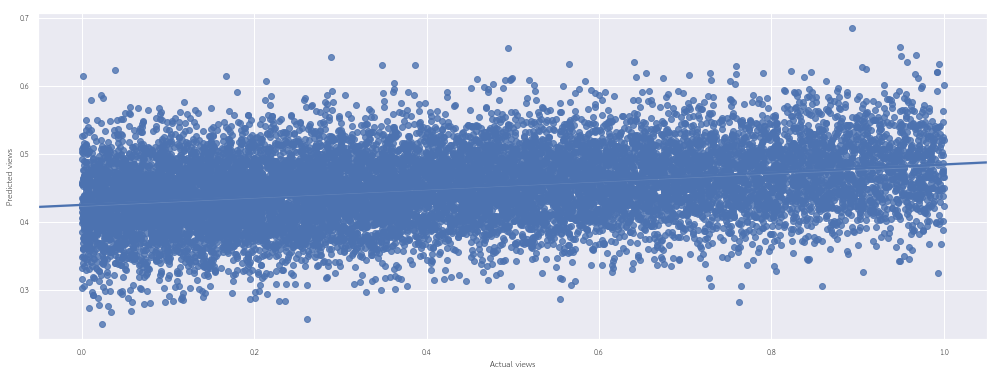

In [439]:
f, ax = plt.subplots(figsize=(17,6))
sns.regplot(x=df_someXdata_LR["Actual views"], y=df_someXdata_LR["Predicted views"])
sns.plt.show()

In [450]:
# some_X_data = x_train[:500]
# some_y_data = y_train[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(model.predict(x_test),y_test )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual views", 0: "Predicted views"})
# df_someXdata_LR[:50]

AttributeError: module 'seaborn' has no attribute 'plt'

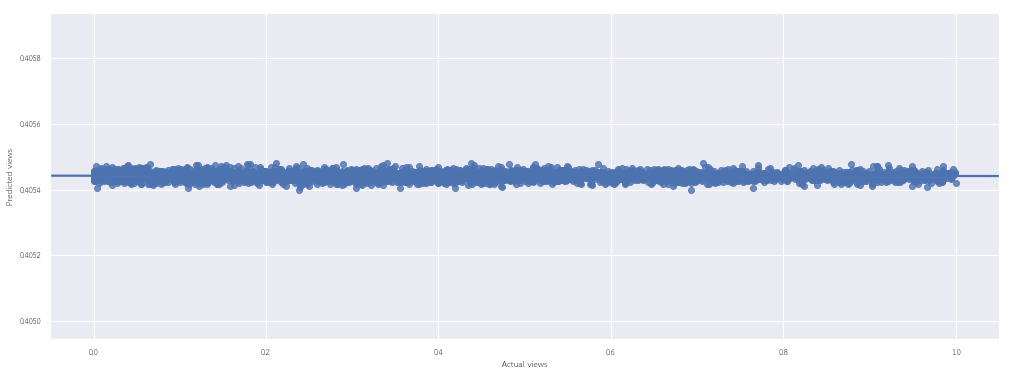

In [451]:
f, ax = plt.subplots(figsize=(17, 6))
sns.regplot(x=df_someXdata_LR["Actual views"], y=df_someXdata_LR["Predicted views"])
sns.plt.show()

/home/burin/py_36_env/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


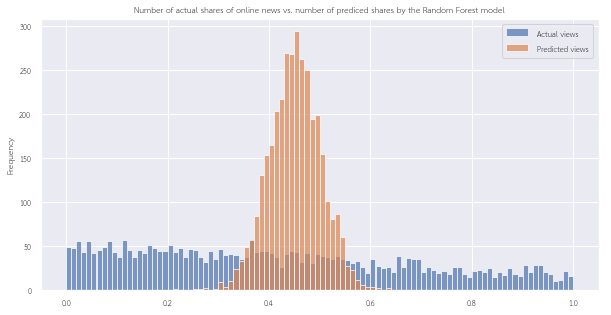

In [442]:
df_someXdata_LR.plot(bins=100, kind='hist', alpha=0.7,figsize=(10,5))
plt.title('Number of actual shares of online news vs. number of prediced shares by the Random Forest model')
axes=plt.axes()
plt.show()

In [273]:
from sklearn.metrics import r2_score

r2_score( y_pred, y_test)

-4.10886989192113

In [275]:
for i in range(0,50):
#     print(y_test[i],y_pred[i])
    print(np.exp(y_pred[i]*MAXVIEW_log),np.exp(y_test[i]*MAXVIEW_log))

[892.4854] [3392.]
[904.42303] [299.]
[958.168] [1256.]
[327.26306] [254.]
[769.2186] [370.]
[961.33356] [2822.]
[988.3851] [283.]
[453.0373] [351.]
[1047.7242] [949.]
[627.5534] [454.]
[464.7116] [1301.]
[586.2819] [649.]
[1766.3689] [2214.]
[711.957] [927.]
[764.4873] [578.]
[730.3877] [589.]
[1098.8494] [322.]
[395.0184] [336.]
[527.66125] [667.]
[446.1227] [1466.]
[925.75165] [746.]
[952.3903] [633.]
[697.6909] [2720.]
[1056.2333] [868.]
[719.3381] [937.]
[692.49457] [417.]
[1033.4259] [323.]
[604.6595] [320.]
[819.9644] [3122.]
[820.7667] [1475.]
[1679.03] [1587.]
[262.64746] [522.]
[906.0569] [2016.]
[719.5182] [456.]
[826.99976] [439.]
[942.248] [320.]
[437.74243] [476.]
[794.8228] [1629.]
[616.4172] [333.]
[632.2561] [1150.]
[893.7933] [874.]
[1371.7599] [669.]
[1270.8999] [437.]
[534.4005] [366.]
[420.20367] [537.]
[543.1136] [1550.]
[773.99255] [1367.]
[1532.7632] [2441.]
[998.5211] [541.]
[1165.1849] [3109.]
